In [1]:
!git clone https://github.com/neheller/kits19
%cd kits19

Cloning into 'kits19'...
remote: Enumerating objects: 1026, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 1026 (delta 6), reused 5 (delta 5), pack-reused 1017 (from 2)
Receiving objects: 100% (1026/1026), 29.74 MiB | 37.09 MiB/s, done.
Resolving deltas: 100% (470/470), done.
/content/kits19


In [2]:
!pip3 install -r requirements.txt


In [3]:
# Takes around 6.5 minutes
# Edit starter code to not download all 300, instead just 100 for starters is fine
!python3 -m starter_code.get_imaging

150 cases to download...
Download 1/150: 
case_00000: 100% 225959/225960 [00:10<00:00, 21897.96KB/s]
Download 2/150: 
case_00001: 100% 276387/276388 [00:11<00:00, 24632.61KB/s]
Download 3/150: 
case_00002: 100% 101967/101968 [00:04<00:00, 21671.53KB/s]
Download 4/150: 
case_00003: 100% 118681/118682 [00:05<00:00, 22401.28KB/s]
Download 5/150: 
case_00004: 100% 25269/25270 [00:02<00:00, 12630.46KB/s]
Download 6/150: 
case_00005: 100% 313477/313478 [00:12<00:00, 24397.78KB/s]
Download 7/150: 
case_00006: 100% 78010/78011 [00:03<00:00, 20527.73KB/s]
Download 8/150: 
case_00007: 100% 25826/25827 [00:02<00:00, 12812.34KB/s]
Download 9/150: 
case_00008: 100% 107068/107069 [00:04<00:00, 21883.72KB/s]
Download 10/150: 
case_00009: 100% 34134/34135 [00:02<00:00, 15829.74KB/s]
Download 11/150: 
case_00010: 100% 23541/23542 [00:01<00:00, 13344.97KB/s]
Download 12/150: 
case_00011: 100% 41268/41269 [00:02<00:00, 16940.59KB/s]
Download 13/150: 
case_00012: 100% 43185/43186 [00:02<00:00, 16260.25KB/

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import nibabel as nib
from tqdm.notebook import tqdm


In [ ]:
img = nib.load("data/case_00000/imaging.nii.gz")
seg = nib.load("data/case_00000/segmentation.nii.gz")

print(img.shape, seg.shape)

(611, 512, 512) (611, 512, 512)


In [ ]:
img_data = img.get_fdata()
seg_data = seg.get_fdata()

In [ ]:
seg_data.dtype

dtype('float64')

In [ ]:
z = img_data.shape[0] // 2
print(z)

305


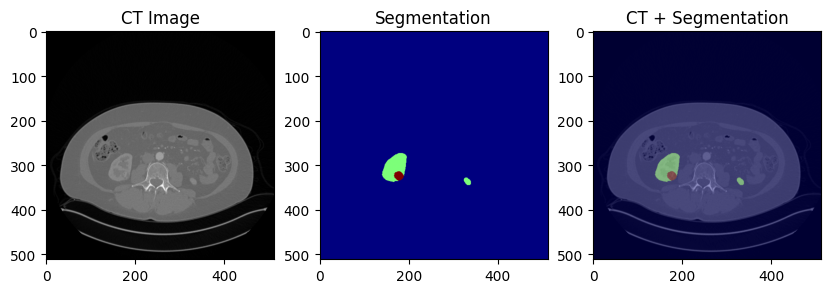

In [ ]:
img_slice = img_data[z]        # CT image slice
seg_slice = seg_data[z]        # segmentation slice

fig, axes = plt.subplots(1, 3, figsize=(10, 5))

axes[0].imshow(img_slice, cmap='gray')
axes[0].set_title("CT Image")
axes[0].axis('on')

axes[1].imshow(seg_slice, cmap='jet')
axes[1].set_title("Segmentation")
axes[1].axis('on')

axes[2].imshow(img_slice, cmap='gray')
axes[2].imshow(seg_slice, cmap='jet', alpha=0.4)  # overlay
axes[2].set_title("CT + Segmentation")
axes[2].axis('on')

plt.show()
# Jet is 0, green is 1, red is 2

In [5]:
from skimage.transform import resize

def resize_slice(slice_, out_size, is_label=False):
    """
    slice_: (H, W)
    out_size: int (e.g. 256, 384, 512)
    is_label: True for segmentation masks
    """
    return resize(
        slice_,
        (out_size, out_size),
        order=0 if is_label else 1,   # nearest for labels, bilinear for images
        preserve_range=True,
        anti_aliasing=not is_label
    ).astype(slice_.dtype)


In [ ]:
img_data_resized = resize_slice(img_slice,384)
seg_data_resized = resize_slice(seg_slice,384,is_label=True)

In [ ]:
img_data_resized.shape, seg_data_resized.shape

((384, 384), (384, 384))

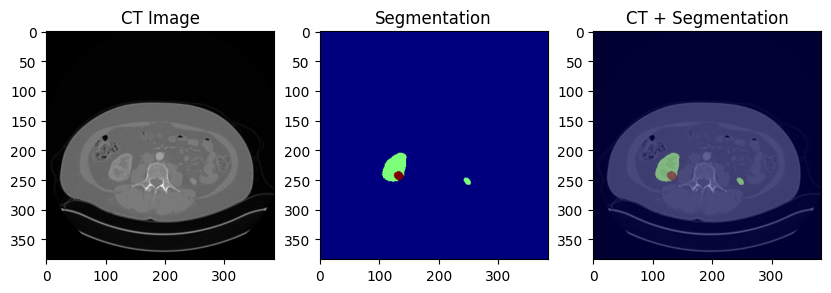

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(10, 5))

axes[0].imshow(img_data_resized, cmap='gray')
axes[0].set_title("CT Image")
axes[0].axis('on')

axes[1].imshow(seg_data_resized, cmap='jet')
axes[1].set_title("Segmentation")
axes[1].axis('on')

axes[2].imshow(img_data_resized, cmap='gray')
axes[2].imshow(seg_data_resized, cmap='jet', alpha=0.4)  # overlay
axes[2].set_title("CT + Segmentation")
axes[2].axis('on')

plt.show()
# Jet is 0, green is 1, red is 2

In [ ]:
seg_slice.shape

(512, 512)

In [38]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader,random_split
torch.manual_seed(42)

In [ ]:
img = nib.load("data/case_00000/imaging.nii.gz")
seg = nib.load("data/case_00000/segmentation.nii.gz")

print(img.get_fdata().shape, seg.get_fdata().shape)

(611, 512, 512) (611, 512, 512)


In [ ]:
i=12
f"{i}".zfill(5)

'00012'

In [ ]:
print("Mask unique values:", torch.unique(torch.tensor(seg.get_fdata()))) # Should be [0, 1, 2]

Mask unique values: tensor([0., 1., 2.], dtype=torch.float64)


In [ ]:
# Figure out the sizing of our 100 images, whether they are all square
# We should be resizing first if images are square, but if images are not square
#   then we need to be padding/cropping

# We also need to be normalizing the images,

# Need to create a separate data for testing
#   Like load 50 more, and simply run them through a pipeline, calculating mean dice score

## Important Notes
1) In the segmentation, a value of 0 represents background, 1 represents kidney, and 2 represents tumor.



In [7]:
class EncoderBlock(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, 3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_channels, out_channels, 3, padding=1),
            nn.ReLU(inplace=True)
        )
        self.pool = nn.MaxPool2d(2)

    def forward(self, x):
        s = self.conv(x)   # skip connection
        p = self.pool(s)
        return s, p


In [8]:
class DecoderBlock(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.up = nn.ConvTranspose2d(in_channels, out_channels, 2, stride=2)
        self.conv = nn.Sequential(
            nn.Conv2d(out_channels * 2, out_channels, 3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_channels, out_channels, 3, padding=1),
            nn.ReLU(inplace=True)
        )

    def forward(self, x, skip):
        x = self.up(x)
        x = torch.cat([skip, x], dim=1)  # concat channels
        return self.conv(x)


In [9]:
class UNet(nn.Module):
    def __init__(self, in_channels=1, num_classes=3):
        super().__init__()

        self.e1 = EncoderBlock(in_channels, 64)
        self.e2 = EncoderBlock(64, 128)
        self.e3 = EncoderBlock(128, 256)
        self.e4 = EncoderBlock(256, 512)

        self.bottleneck = nn.Sequential(
            nn.Conv2d(512, 1024, 3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(1024, 1024, 3, padding=1),
            nn.ReLU(inplace=True)
        )

        self.d1 = DecoderBlock(1024, 512)
        self.d2 = DecoderBlock(512, 256)
        self.d3 = DecoderBlock(256, 128)
        self.d4 = DecoderBlock(128, 64)

        self.out = nn.Conv2d(64, num_classes, 1)

    def forward(self, x):
        s1, p1 = self.e1(x)
        s2, p2 = self.e2(p1)
        s3, p3 = self.e3(p2)
        s4, p4 = self.e4(p3)

        b = self.bottleneck(p4)

        d1 = self.d1(b, s4)
        d2 = self.d2(d1, s3)
        d3 = self.d3(d2, s2)
        d4 = self.d4(d3, s1)

        return self.out(d4) # [B,3,512,512]


In [10]:
def pad_or_crop(x, out_size):
    h, w = x.shape

    # ---- CROP if larger ----
    if h > out_size:
        start = (h - out_size) // 2
        x = x[start:start+out_size, :]
        h = out_size

    if w > out_size:
        start = (w - out_size) // 2
        x = x[:, start:start+out_size]
        w = out_size

    # ---- PAD if smaller ----
    pad_h = out_size - h
    pad_w = out_size - w

    pad_top = pad_h // 2
    pad_bottom = pad_h - pad_top
    pad_left = pad_w // 2
    pad_right = pad_w - pad_left

    return np.pad(
        x,
        ((pad_top, pad_bottom), (pad_left, pad_right)),
        mode="constant"
    )


In [11]:
def count_slices(root_dir, case_ids):
    total = 0
    for i in case_ids:
        img = nib.load(os.path.join(root_dir, f"case_{i:05d}", "imaging.nii.gz"))
        total += img.shape[0]
        if i % 10 == 0:
            print(f"{i} | {total}")
    return total

# N = count_slices("data", range(100))

"""
# of Cases Loaded | Depth
10 | 3164
20 | 4514
30 | 6738
40 | 8095
50 | 10046
60 | 12652
70 | 15041
80 | 16793
90 | 18018
100 | 21178
"""
N = count_slices("data", range(150))

0 | 611
10 | 3214
20 | 4610
30 | 6776
40 | 8302
50 | 10142
60 | 12797
70 | 15098
80 | 16881
90 | 18094
100 | 21648
110 | 23755
120 | 26277
130 | 27747
140 | 29987


In [12]:
OUT_SIZE = 384

In [13]:
# Should N not be different for

In [14]:
class KITS19SliceDiskWriter():
    def __init__(self,case_ids,root_dir="data",N =N , out_dir="/content/kits19/data",out_size=OUT_SIZE, isTrain=True):
      self.out_dir = out_dir
      train_or_test = "train" if isTrain else "test"
      self.img_mm = np.memmap(
          os.path.join(out_dir, f"{train_or_test}_imaging.memmap"),
          dtype=np.float32,
          mode="w+",
          shape=(N, 1, out_size, out_size)
      )
      self.seg_mm = np.memmap(
          os.path.join(out_dir, f"{train_or_test}_segmentation.memmap"),
          dtype=np.int16,
          mode="w+",
          shape=(N, 1, out_size, out_size)
      )
      self.out_size = out_size

      # We will later divide this by N
      self.mean = 0
      self.std = 0

      write_idx = 0

      for i in tqdm(case_ids, desc="Writing KiTS19 to disk"):
        case_ = f"case_{i:05d}"

        img = nib.load(os.path.join(root_dir, case_, f"imaging.nii.gz"))
        seg = nib.load(os.path.join(root_dir, case_, f"segmentation.nii.gz"))

        img_data = img.get_fdata(dtype=np.float32)
        seg_data = np.asarray(seg.dataobj, dtype=np.int16)



        for z in range(img_data.shape[0]):
          img_slice = pad_or_crop(img_data[z], self.out_size)
          seg_slice = pad_or_crop(seg_data[z], self.out_size)

          img_slice = resize_slice(img_slice, self.out_size)
          seg_slice = resize_slice(seg_slice, self.out_size, is_label=True)

          self.mean += img_slice.mean()
          self.std += img_slice.std()

          self.img_mm[write_idx, 0] = img_slice
          self.seg_mm[write_idx, 0] = seg_slice
          write_idx += 1

      self.img_mm.flush()
      self.seg_mm.flush()
      self.mean /= (N * self.out_size * self.out_size)
      self.std /= (N * self.out_size * self.out_size)

In [15]:
N

32011

In [16]:
class KITS19SliceDataset(torch.utils.data.Dataset):
    def __init__(self, data_dir, N_total, out_size, indices=None, mean=None, std=None, isTrain=True):
        train_or_test = "train" if isTrain else "test"
        self.imgs = np.memmap(
            os.path.join(data_dir, f"{train_or_test}_imaging.memmap"),
            dtype=np.float32, mode="r", shape=(N_total, 1, out_size, out_size)
        )
        self.segs = np.memmap(
            os.path.join(data_dir, f"{train_or_test}_segmentation.memmap"),
            dtype=np.int16, mode="r", shape=(N_total, 1, out_size, out_size)
        )
        # If no indices provided, use all (default behavior)
        self.indices = indices if indices is not None else np.arange(N_total)
        self.mean = mean
        self.std = std

    def __len__(self):
        return len(self.indices)

    def __getitem__(self, idx):
        # Map the 'virtual' index to the 'real' memmap index
        real_idx = self.indices[idx]

        img = self.imgs[real_idx]
        seg = self.segs[real_idx]

        if (self.mean is not None) and (self.std is not None):
            img = (img - self.mean) / self.std

        return torch.from_numpy(img), torch.from_numpy(seg).long()

In [17]:
# Send data to disk with low RAM overhead
diskWriterTrain = KITS19SliceDiskWriter(range(100), N = count_slices("data", range(100)), isTrain=True)

0 | 611
10 | 3214
20 | 4610
30 | 6776
40 | 8302
50 | 10142
60 | 12797
70 | 15098
80 | 16881
90 | 18094


Writing KiTS19 to disk:   0%|          | 0/100 [00:00<?, ?it/s]

In [18]:
diskWriterTrain.mean, diskWriterTrain.std

(np.float32(-0.0015804729), np.float32(0.002714923))

In [19]:
diskWriterTest = KITS19SliceDiskWriter(range(100,150), N = count_slices("data", range(100,150)), isTrain=False)

100 | 470
110 | 2577
120 | 5099
130 | 6569
140 | 8809


Writing KiTS19 to disk:   0%|          | 0/50 [00:00<?, ?it/s]

In [20]:
diskWriterTest.mean, diskWriterTest.std

(np.float32(-0.0015115176), np.float32(0.0026596268))

In [21]:
diskWriterTrain.seg_mm.shape

(21178, 1, 384, 384)

In [22]:
diskWriterTest.seg_mm.shape

(10833, 1, 384, 384)

In [23]:
valid_indices_train = []
for i in tqdm(range(diskWriterTrain.seg_mm.shape[0]), desc="Filtering Slices"):
    if np.any(diskWriterTrain.seg_mm[i] > 0): # Check for class 1 or 2
        valid_indices_train.append(i)

print(f"Total slices: {diskWriterTrain.seg_mm.shape[0]}")
print(f"Slices with content: {len(valid_indices_train)}")

Filtering Slices:   0%|          | 0/21178 [00:00<?, ?it/s]

Total slices: 21178
Slices with content: 7765


In [24]:


# Should not be filtering the  testing data. It is the testing data for a reason lmao
# I've set the indices in the test dataset to None but this is just to see
valid_indices_test = []
for i in tqdm(range(diskWriterTest.seg_mm.shape[0]), desc="Filtering Slices"):
    if np.any(diskWriterTest.seg_mm[i] > 0): # Check for class 1 or 2
        valid_indices_test.append(i)

print(f"Total slices: {diskWriterTest.seg_mm.shape[0]}")
print(f"Slices with content: {len(valid_indices_test)}")

Filtering Slices:   0%|          | 0/10833 [00:00<?, ?it/s]

Total slices: 10833
Slices with content: 4297


In [45]:
from sklearn.model_selection import train_test_split

# Split your 7,765 indices into train and val
train_idx, val_idx = train_test_split(valid_indices_train, test_size=0.2, random_state=42)

# Create datasets using the filtered indices
# Note: N_total is still the original 21178 because that's the memmap shape
train_ds = KITS19SliceDataset(
    data_dir="/content/kits19/data",
    N_total=21178,
    out_size=384,
    indices=train_idx,
    mean=diskWriterTrain.mean,
    std=diskWriterTrain.std
)

val_ds = KITS19SliceDataset(
    data_dir="/content/kits19/data",
    N_total=21178,
    out_size=384,
    indices=val_idx,
    mean=diskWriterTrain.mean,
    std=diskWriterTrain.std
)

test_ds = KITS19SliceDataset(
    data_dir="/content/kits19/data",
    N_total=10833,
    out_size=384,
    indices=None,
    mean=diskWriterTest.mean,
    std=diskWriterTest.std
)

In [46]:
batch_size = 8
train_loader = DataLoader(
    train_ds,
    batch_size=batch_size,
    shuffle=True,
    num_workers=8,# make this 0
    pin_memory=True,
    persistent_workers=True

)

val_loader = DataLoader(
    val_ds,
    batch_size=batch_size,
    shuffle=False,
    num_workers=8,# make this 0
    pin_memory=True,
    persistent_workers=True

)

test_loader = DataLoader(
    test_ds,
    batch_size=batch_size,
    shuffle=False,
    num_workers=8,# make this 0
    pin_memory=True,
    persistent_workers=True

)


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


In [27]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [28]:
b = torch.arange(4 * 5 * 6).view(4, 5, 6)
b

tensor([[[  0,   1,   2,   3,   4,   5],
         [  6,   7,   8,   9,  10,  11],
         [ 12,  13,  14,  15,  16,  17],
         [ 18,  19,  20,  21,  22,  23],
         [ 24,  25,  26,  27,  28,  29]],

        [[ 30,  31,  32,  33,  34,  35],
         [ 36,  37,  38,  39,  40,  41],
         [ 42,  43,  44,  45,  46,  47],
         [ 48,  49,  50,  51,  52,  53],
         [ 54,  55,  56,  57,  58,  59]],

        [[ 60,  61,  62,  63,  64,  65],
         [ 66,  67,  68,  69,  70,  71],
         [ 72,  73,  74,  75,  76,  77],
         [ 78,  79,  80,  81,  82,  83],
         [ 84,  85,  86,  87,  88,  89]],

        [[ 90,  91,  92,  93,  94,  95],
         [ 96,  97,  98,  99, 100, 101],
         [102, 103, 104, 105, 106, 107],
         [108, 109, 110, 111, 112, 113],
         [114, 115, 116, 117, 118, 119]]])

In [29]:
torch.sum(b, (2, 1))

tensor([ 435, 1335, 2235, 3135])

In [30]:
b.shape

torch.Size([4, 5, 6])

In [31]:
def dice_score(preds, targets, eps=1e-6):

  """
  Ranging from 0 (no overlap) to 1 (perfect overlap)
  preds: (B,C,H,W)
  targets: (B,H,W)
  """

  preds = torch.argmax(preds, dim=1)  # (B,H,W)

  preds_oh = torch.nn.functional.one_hot(preds, num_classes=3).permute(0,3,1,2)
  targets_oh = torch.nn.functional.one_hot(targets, num_classes=3).permute(0,3,1,2)

  intersection = (preds_oh * targets_oh).sum(dim=(2,3))
  union = preds_oh.sum(dim=(2,3)) + targets_oh.sum(dim=(2,3))

  dice = (2 * intersection + eps) / (union + eps)

  # NEW: Create a mask of which classes actually exist in the target
  # target_exists shape: (B, 3)
  target_exists = (targets_oh.sum(dim=(2,3)) > 0).float()

  # exclude background (class 0)
  return dice, target_exists # dice[:, 1:].mean()


In [32]:
def dice_loss(preds, targets, smooth=1e-5):
    preds = torch.softmax(preds, dim=1)
    targets_onehot = torch.nn.functional.one_hot(
        targets, num_classes=preds.shape[1] # always 3
    ).permute(0, 3, 1, 2).float()

    intersection = (preds * targets_onehot).sum(dim=(2,3))
    union = preds.sum(dim=(2,3)) + targets_onehot.sum(dim=(2,3))
    dice = (2 * intersection + smooth) / (union + smooth)

    return 1 - dice.mean()


In [40]:
model = UNet().to(device)
weights = torch.tensor([0.01, 2.0, 10.0]).to(device)
criterion = nn.CrossEntropyLoss(weight=weights) # added label weights
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-4)

In [ ]:
img_data_resized.shape, seg_data_resized.shape
img_data_resized = np.expand_dims(img_data_resized, axis=0).astype(np.float32)
seg_data_resized = np.expand_dims(seg_data_resized, axis=0).astype(np.int16)
print(img_data_resized.shape, seg_data_resized.shape)

In [ ]:
device

In [ ]:
img_tensor = torch.from_numpy(img_data_resized)
seg_tensor = torch.from_numpy(seg_data_resized)

img_tensor = img_tensor.to(device,non_blocking=True)
seg_tensor = seg_tensor.to(device,non_blocking=True)
print(img_tensor.shape,seg_tensor.shape)

In [ ]:
img_1 = img_tensor.reshape(1,1,384,384)
masks_1 = seg_tensor.reshape(1,384,384).long()

In [ ]:
model.eval()
with torch.no_grad():
  preds = model(img_1)
  loss_c = criterion(preds,masks_1)
  loss_d = dice_loss(preds,masks_1)
  print(loss_c,loss_d)
  loss = criterion(preds, masks_1) + dice_loss(preds, masks_1)
  dice = dice_score(preds, masks_1)
  print(f"Loss: {loss} | Dice Score: {dice}")

In [ ]:
dice_background = dice[:,0]
dice_kidney = dice[:,1]
dice_tumor = dice[:,2]


In [ ]:
(dice_background + dice_kidney + dice_tumor).item()

In [ ]:
preds_labels = torch.argmax(preds,dim=1)
preds_labels

In [ ]:
preds_labels.shape

In [ ]:
preds_labels

In [ ]:
for images,masks in val_loader:
  print(images.shape, masks.shape)
  masks = masks.squeeze(1)
  print(masks.shape)
  break

In [41]:
import warnings
warnings.filterwarnings("ignore", message="The given NumPy array is not writable")


In [42]:
import gc
gc.collect()
torch.cuda.empty_cache()


In [43]:
num_params = sum(p.numel() for p in model.parameters())
num_trainable = sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f"Total parameters: {num_params:,}")
print(f"Trainable parameters: {num_trainable:,}")


Total parameters: 31,030,723
Trainable parameters: 31,030,723


In [ ]:
images, masks = next(iter(val_loader))
preds = model(images.to(device))
dice, target_exists = dice_score(preds, masks.to(device).squeeze(1))

print("Dice Shape:", dice.shape) # Should be (8, 3)
print("Dice Sample Row 0:", dice[0])
print("Mask unique values:", torch.unique(masks)) # Should be [0, 1, 2]

In [ ]:
# Debugging the one-hot conversion
targets_oh = torch.nn.functional.one_hot(masks.to(device).squeeze(1).long(), num_classes=3).permute(0,3,1,2)

print(f"Channel 0 sum (Background?): {targets_oh[0, 0].sum().item()}")
print(f"Channel 1 sum (Kidney?): {targets_oh[0, 1].sum().item()}")
print(f"Channel 2 sum (Tumor?): {targets_oh[0, 2].sum().item()}")

In [ ]:
masks.dtype

In [35]:
len(train_loader), len(val_loader)

(777, 195)

In [47]:
num_epochs = 20
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer,
    mode='max',
    factor=0.5,
    patience=5
)
weights = torch.tensor([0.1, 1.0, 2.0]).to(device)

# epoch -> results
history = {}

for epoch in range(num_epochs):
    print(f"\nEpoch [{epoch+1}/{num_epochs}]")

    # --------------------
    # TRAINING PHASE
    # --------------------
    model.train()
    train_loss = 0.0
    train_loss_c = 0.0
    train_loss_d = 0.0

    train_bar = tqdm(train_loader, desc="Training", leave=False)

    for batch_idx, (images, masks) in enumerate(train_bar):
        images = images.to(device, non_blocking=True)
        #(B,1,512,512) -> (B,512,512)
        masks = masks.to(device, non_blocking=True).squeeze(1)
        optimizer.zero_grad(set_to_none=True)

        # Forward
        preds = model(images)
        loss_c = criterion(preds,masks)
        loss_d = dice_loss(preds,masks)
        loss = loss_c + loss_d

        # Backprop
        loss.backward()
        optimizer.step()

        if torch.isfinite(loss):
          train_loss += loss.item()
          train_loss_c += loss_c.item()
          train_loss_d += loss_d.item()

        # Update progress bar
        train_bar.set_postfix(
            batch=batch_idx,
            loss=f"{loss.item():.4f}"
        )

    avg_train_loss = train_loss / len(train_loader)
    avg_train_loss_c = train_loss_c / len(train_loader)
    avg_train_loss_d = train_loss_d / len(train_loader)


    # --------------------
    # VALIDATION PHASE
    # --------------------
    model.eval()
    val_loss = 0.0
    val_loss_c = 0.0
    val_loss_d = 0.0


    dice_b_sum = 0.0
    dice_k_sum = 0.0
    dice_t_sum = 0.0

    b_exists_count = 0
    k_exists_count = 0
    t_exists_count = 0

    with torch.no_grad():
        val_bar = tqdm(val_loader, desc="Validation", leave=False)
        total_samples = 0
        for images, masks in val_bar:
            batch_size = images.shape[0]

            images = images.to(device, non_blocking=True)
            masks = masks.to(device, non_blocking=True).squeeze(1)

            preds = model(images)

            loss_c = criterion(preds,masks)
            loss_d = dice_loss(preds,masks)
            loss = loss_c + loss_d

            val_loss += loss.item()
            val_loss_c += loss_c.item()
            val_loss_d += loss_d.item()

            dice, target_exists = dice_score(preds, masks)


            dice_b_sum += (dice[:,0] * target_exists[:,0]).sum().item()
            b_exists_count += target_exists[:,0].sum().item()

            dice_k_sum += (dice[:,1] * target_exists[:,1]).sum().item()
            k_exists_count += target_exists[:,1].sum().item()

            dice_t_sum += (dice[:,2] * target_exists[:,2]).sum().item()
            t_exists_count += target_exists[:,2].sum().item()


            total_samples += batch_size

            val_bar.set_postfix(
                loss=f"{loss.item():.4f}",
            )

    avg_val_loss = val_loss / len(val_loader)
    avg_val_loss_c = val_loss_c / len(val_loader)
    avg_val_loss_d = val_loss_d / len(val_loader)

    avg_dice_b = dice_b_sum / (b_exists_count + 1e-6)
    avg_dice_k = dice_k_sum / (k_exists_count + 1e-6)
    avg_dice_t = dice_t_sum / (t_exists_count + 1e-6)

    avg_valid_dice = (avg_dice_k + avg_dice_t) / 2

    # Step scheduler ONCE per epoch
    scheduler.step(avg_valid_dice)

    print(
        f"Epoch {epoch+1:02d} | "

        f"Train Total Loss: {avg_train_loss:.4f} | "
        f"Train Criterion Loss: {avg_train_loss_c:.4f} | "
        f"Train Dice Loss: {avg_train_loss_d:.4f} | "

        f"Val Loss: {avg_val_loss:.4f} | "
        f"Val Criterion Loss: {avg_val_loss_c:.4f} | "
        f"Val Dice Loss: {avg_val_loss_d:.4f} | "

        f"Dice(B) Score: {avg_dice_b:.4f} | "
        f"Dice(K) Score: {avg_dice_k:.4f} | "
        f"Dice(T) Score: {avg_dice_t:.4f} | "
        f"Dice(KT) Score: {avg_valid_dice:.4f}"
    )

    history[epoch] = {
        "train_loss":avg_train_loss,
        "train_loss_c":avg_train_loss_c,
        "train_loss_d":avg_train_loss_d,
        "val_loss":avg_val_loss,
        "val_loss_c":avg_val_loss_c,
        "val_loss_d":avg_val_loss,
        "dice_b": avg_dice_b,
        "dice_k": avg_dice_k,
        "dice_t": avg_dice_t,
        "dice_kt": avg_valid_dice
    }



Epoch [1/20]


Training:   0%|          | 0/777 [00:00<?, ?it/s]

Validation:   0%|          | 0/195 [00:00<?, ?it/s]

Epoch 01 | Train Total Loss: 6.3032 | Train Criterion Loss: 5.6239 | Train Dice Loss: 0.6793 | Val Loss: 1.6560 | Val Criterion Loss: 0.9804 | Val Dice Loss: 0.6756 | Dice(B) Score: 0.7495 | Dice(K) Score: 0.1489 | Dice(T) Score: 0.0004 | Dice(KT) Score: 0.0747

Epoch [2/20]


Training:   0%|          | 0/777 [00:00<?, ?it/s]

Validation:   0%|          | 0/195 [00:00<?, ?it/s]

Epoch 02 | Train Total Loss: 1.6313 | Train Criterion Loss: 0.9550 | Train Dice Loss: 0.6763 | Val Loss: 1.6098 | Val Criterion Loss: 0.9370 | Val Dice Loss: 0.6729 | Dice(B) Score: 0.7649 | Dice(K) Score: 0.1563 | Dice(T) Score: 0.0008 | Dice(KT) Score: 0.0786

Epoch [3/20]


Training:   0%|          | 0/777 [00:00<?, ?it/s]

Validation:   0%|          | 0/195 [00:00<?, ?it/s]

Epoch 03 | Train Total Loss: 1.5922 | Train Criterion Loss: 0.9172 | Train Dice Loss: 0.6751 | Val Loss: 1.5750 | Val Criterion Loss: 0.9039 | Val Dice Loss: 0.6712 | Dice(B) Score: 0.7749 | Dice(K) Score: 0.1615 | Dice(T) Score: 0.0016 | Dice(KT) Score: 0.0815

Epoch [4/20]


Training:   0%|          | 0/777 [00:00<?, ?it/s]

Validation:   0%|          | 0/195 [00:00<?, ?it/s]

Epoch 04 | Train Total Loss: 1.5579 | Train Criterion Loss: 0.8839 | Train Dice Loss: 0.6740 | Val Loss: 1.5429 | Val Criterion Loss: 0.8697 | Val Dice Loss: 0.6732 | Dice(B) Score: 0.7744 | Dice(K) Score: 0.1627 | Dice(T) Score: 0.0020 | Dice(KT) Score: 0.0824

Epoch [5/20]


Training:   0%|          | 0/777 [00:00<?, ?it/s]

Validation:   0%|          | 0/195 [00:00<?, ?it/s]

Epoch 05 | Train Total Loss: 1.5318 | Train Criterion Loss: 0.8578 | Train Dice Loss: 0.6740 | Val Loss: 1.5209 | Val Criterion Loss: 0.8493 | Val Dice Loss: 0.6716 | Dice(B) Score: 0.7832 | Dice(K) Score: 0.1660 | Dice(T) Score: 0.0026 | Dice(KT) Score: 0.0843

Epoch [6/20]


Training:   0%|          | 0/777 [00:00<?, ?it/s]

Validation:   0%|          | 0/195 [00:00<?, ?it/s]

Epoch 06 | Train Total Loss: 1.5036 | Train Criterion Loss: 0.8306 | Train Dice Loss: 0.6730 | Val Loss: 1.4830 | Val Criterion Loss: 0.8217 | Val Dice Loss: 0.6613 | Dice(B) Score: 0.8090 | Dice(K) Score: 0.1861 | Dice(T) Score: 0.0040 | Dice(KT) Score: 0.0950

Epoch [7/20]


Training:   0%|          | 0/777 [00:00<?, ?it/s]

Validation:   0%|          | 0/195 [00:00<?, ?it/s]

Epoch 07 | Train Total Loss: 1.4708 | Train Criterion Loss: 0.8058 | Train Dice Loss: 0.6649 | Val Loss: 1.4735 | Val Criterion Loss: 0.8191 | Val Dice Loss: 0.6544 | Dice(B) Score: 0.8256 | Dice(K) Score: 0.1929 | Dice(T) Score: 0.0037 | Dice(KT) Score: 0.0983

Epoch [8/20]


Training:   0%|          | 0/777 [00:00<?, ?it/s]

Validation:   0%|          | 0/195 [00:00<?, ?it/s]

Epoch 08 | Train Total Loss: 1.4414 | Train Criterion Loss: 0.7891 | Train Dice Loss: 0.6523 | Val Loss: 1.4623 | Val Criterion Loss: 0.7915 | Val Dice Loss: 0.6708 | Dice(B) Score: 0.7890 | Dice(K) Score: 0.1746 | Dice(T) Score: 0.0059 | Dice(KT) Score: 0.0903

Epoch [9/20]


Training:   0%|          | 0/777 [00:00<?, ?it/s]

Validation:   0%|          | 0/195 [00:00<?, ?it/s]

Epoch 09 | Train Total Loss: 1.4339 | Train Criterion Loss: 0.7675 | Train Dice Loss: 0.6664 | Val Loss: 1.3903 | Val Criterion Loss: 0.7410 | Val Dice Loss: 0.6493 | Dice(B) Score: 0.8273 | Dice(K) Score: 0.2193 | Dice(T) Score: 0.0525 | Dice(KT) Score: 0.1359

Epoch [10/20]


Training:   0%|          | 0/777 [00:00<?, ?it/s]

Validation:   0%|          | 0/195 [00:00<?, ?it/s]

Epoch 10 | Train Total Loss: 1.3496 | Train Criterion Loss: 0.7032 | Train Dice Loss: 0.6464 | Val Loss: 1.3129 | Val Criterion Loss: 0.6551 | Val Dice Loss: 0.6578 | Dice(B) Score: 0.7939 | Dice(K) Score: 0.2687 | Dice(T) Score: 0.0786 | Dice(KT) Score: 0.1736

Epoch [11/20]


Training:   0%|          | 0/777 [00:00<?, ?it/s]

Validation:   0%|          | 0/195 [00:00<?, ?it/s]

Epoch 11 | Train Total Loss: 1.2330 | Train Criterion Loss: 0.6258 | Train Dice Loss: 0.6072 | Val Loss: 1.1143 | Val Criterion Loss: 0.5590 | Val Dice Loss: 0.5553 | Dice(B) Score: 0.9004 | Dice(K) Score: 0.5791 | Dice(T) Score: 0.1353 | Dice(KT) Score: 0.3572

Epoch [12/20]


Training:   0%|          | 0/777 [00:00<?, ?it/s]

Validation:   0%|          | 0/195 [00:00<?, ?it/s]

Epoch 12 | Train Total Loss: 1.0542 | Train Criterion Loss: 0.5223 | Train Dice Loss: 0.5319 | Val Loss: 0.9957 | Val Criterion Loss: 0.4679 | Val Dice Loss: 0.5278 | Dice(B) Score: 0.9100 | Dice(K) Score: 0.6166 | Dice(T) Score: 0.1411 | Dice(KT) Score: 0.3789

Epoch [13/20]


Training:   0%|          | 0/777 [00:00<?, ?it/s]

Validation:   0%|          | 0/195 [00:00<?, ?it/s]

Epoch 13 | Train Total Loss: 0.8949 | Train Criterion Loss: 0.4223 | Train Dice Loss: 0.4726 | Val Loss: 0.8569 | Val Criterion Loss: 0.3981 | Val Dice Loss: 0.4588 | Dice(B) Score: 0.9521 | Dice(K) Score: 0.7287 | Dice(T) Score: 0.2335 | Dice(KT) Score: 0.4811

Epoch [14/20]


Training:   0%|          | 0/777 [00:00<?, ?it/s]

Validation:   0%|          | 0/195 [00:00<?, ?it/s]

Epoch 14 | Train Total Loss: 0.7546 | Train Criterion Loss: 0.3282 | Train Dice Loss: 0.4264 | Val Loss: 0.7118 | Val Criterion Loss: 0.2865 | Val Dice Loss: 0.4253 | Dice(B) Score: 0.9531 | Dice(K) Score: 0.8225 | Dice(T) Score: 0.2432 | Dice(KT) Score: 0.5328

Epoch [15/20]


Training:   0%|          | 0/777 [00:00<?, ?it/s]

Validation:   0%|          | 0/195 [00:00<?, ?it/s]

Epoch 15 | Train Total Loss: 0.6550 | Train Criterion Loss: 0.2598 | Train Dice Loss: 0.3953 | Val Loss: 0.6136 | Val Criterion Loss: 0.2440 | Val Dice Loss: 0.3696 | Dice(B) Score: 0.9836 | Dice(K) Score: 0.8752 | Dice(T) Score: 0.4363 | Dice(KT) Score: 0.6557

Epoch [16/20]


Training:   0%|          | 0/777 [00:00<?, ?it/s]

Validation:   0%|          | 0/195 [00:00<?, ?it/s]

Epoch 16 | Train Total Loss: 0.5895 | Train Criterion Loss: 0.2165 | Train Dice Loss: 0.3729 | Val Loss: 0.5345 | Val Criterion Loss: 0.1899 | Val Dice Loss: 0.3446 | Dice(B) Score: 0.9846 | Dice(K) Score: 0.8952 | Dice(T) Score: 0.4872 | Dice(KT) Score: 0.6912

Epoch [17/20]


Training:   0%|          | 0/777 [00:00<?, ?it/s]

Validation:   0%|          | 0/195 [00:00<?, ?it/s]

Epoch 17 | Train Total Loss: 0.5302 | Train Criterion Loss: 0.1754 | Train Dice Loss: 0.3548 | Val Loss: 0.5432 | Val Criterion Loss: 0.2022 | Val Dice Loss: 0.3410 | Dice(B) Score: 0.9888 | Dice(K) Score: 0.8975 | Dice(T) Score: 0.5307 | Dice(KT) Score: 0.7141

Epoch [18/20]


Training:   0%|          | 0/777 [00:00<?, ?it/s]

Validation:   0%|          | 0/195 [00:00<?, ?it/s]

Epoch 18 | Train Total Loss: 0.5461 | Train Criterion Loss: 0.1907 | Train Dice Loss: 0.3553 | Val Loss: 0.4816 | Val Criterion Loss: 0.1457 | Val Dice Loss: 0.3359 | Dice(B) Score: 0.9854 | Dice(K) Score: 0.9023 | Dice(T) Score: 0.5278 | Dice(KT) Score: 0.7150

Epoch [19/20]


Training:   0%|          | 0/777 [00:00<?, ?it/s]

Validation:   0%|          | 0/195 [00:00<?, ?it/s]

Epoch 19 | Train Total Loss: 0.4605 | Train Criterion Loss: 0.1283 | Train Dice Loss: 0.3322 | Val Loss: 0.4813 | Val Criterion Loss: 0.1692 | Val Dice Loss: 0.3121 | Dice(B) Score: 0.9920 | Dice(K) Score: 0.9258 | Dice(T) Score: 0.6083 | Dice(KT) Score: 0.7671

Epoch [20/20]


Training:   0%|          | 0/777 [00:00<?, ?it/s]

Validation:   0%|          | 0/195 [00:00<?, ?it/s]

Epoch 20 | Train Total Loss: 0.4283 | Train Criterion Loss: 0.1100 | Train Dice Loss: 0.3183 | Val Loss: 0.4346 | Val Criterion Loss: 0.1156 | Val Dice Loss: 0.3189 | Dice(B) Score: 0.9908 | Dice(K) Score: 0.9095 | Dice(T) Score: 0.6143 | Dice(KT) Score: 0.7619


In [48]:
# Predict model on test datas


# --------------------
# TESTING PHASE
# --------------------
model.eval()
val_loss = 0.0
val_loss_c = 0.0
val_loss_d = 0.0


dice_b_sum = 0.0
dice_k_sum = 0.0
dice_t_sum = 0.0

b_exists_count = 0
k_exists_count = 0
t_exists_count = 0

with torch.no_grad():
    val_bar = tqdm(test_loader, desc="Testing", leave=False)
    total_samples = 0
    for images, masks in val_bar:
        batch_size = images.shape[0]

        images = images.to(device, non_blocking=True)
        masks = masks.to(device, non_blocking=True).squeeze(1)

        preds = model(images)

        loss_c = criterion(preds,masks)
        loss_d = dice_loss(preds,masks)
        loss = loss_c + loss_d

        val_loss += loss.item()
        val_loss_c += loss_c.item()
        val_loss_d += loss_d.item()

        dice, target_exists = dice_score(preds, masks)


        dice_b_sum += (dice[:,0] * target_exists[:,0]).sum().item()
        b_exists_count += target_exists[:,0].sum().item()

        dice_k_sum += (dice[:,1] * target_exists[:,1]).sum().item()
        k_exists_count += target_exists[:,1].sum().item()

        dice_t_sum += (dice[:,2] * target_exists[:,2]).sum().item()
        t_exists_count += target_exists[:,2].sum().item()


        total_samples += batch_size

        val_bar.set_postfix(
            loss=f"{loss.item():.4f}",
        )

avg_val_loss = val_loss / len(val_loader)
avg_val_loss_c = val_loss_c / len(val_loader)
avg_val_loss_d = val_loss_d / len(val_loader)

avg_dice_b = dice_b_sum / (b_exists_count + 1e-6)
avg_dice_k = dice_k_sum / (k_exists_count + 1e-6)
avg_dice_t = dice_t_sum / (t_exists_count + 1e-6)

avg_valid_dice = (avg_dice_k + avg_dice_t) / 2

print(


    f"Val Loss: {avg_val_loss:.4f} | "
    f"Val Criterion Loss: {avg_val_loss_c:.4f} | "
    f"Val Dice Loss: {avg_val_loss_d:.4f} | "

    f"Dice(B) Score: {avg_dice_b:.4f} | "
    f"Dice(K) Score: {avg_dice_k:.4f} | "
    f"Dice(T) Score: {avg_dice_t:.4f} | "
    f"Dice(KT) Score: {avg_valid_dice:.4f}"
)



Testing:   0%|          | 0/1355 [00:00<?, ?it/s]

Val Loss: 5.0546 | Val Criterion Loss: 1.2692 | Val Dice Loss: 3.7855 | Dice(B) Score: 0.9831 | Dice(K) Score: 0.9096 | Dice(T) Score: 0.5929 | Dice(KT) Score: 0.7512


In [ ]:
t# Try to understand the calcuation for batches is
# -> it appears that the len(train_loader) is the # batches
# -> And why is my validation batch only 271. is len(val_loader) == 271?

In [49]:
from google.colab import files

In [51]:
torch.save({
    "epoch": epoch,
    "model_state_dict": model.state_dict(),
    "optimizer_state_dict": optimizer.state_dict(),
}, "/content/unet_checkpoint.pth")


files.download("/content/unet_checkpoint.pth")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
"""
This was 2D UNet
Epoch 01 | Train Loss: 736.3514 | Val Loss: 0.3978 | Dice Score: 0.8077

Epoch [2/10]
Epoch 02 | Train Loss: 0.4078 | Val Loss: 0.4490 | Dice Score: 0.7350

Epoch [3/10]
Epoch 03 | Train Loss: 0.3949 | Val Loss: 0.3900 | Dice Score: 0.7659

Epoch [4/10]
Epoch 04 | Train Loss: 64.6625 | Val Loss: 0.9572 | Dice Score: 0.9089

Epoch [5/10]
Epoch 05 | Train Loss: 0.9595 | Val Loss: 0.9569 | Dice Score: 0.9089

Epoch [6/10]
Epoch 06 | Train Loss: 0.9590 | Val Loss: 0.9568 | Dice Score: 0.9089

Epoch [7/10]
Epoch 07 | Train Loss: 0.9594 | Val Loss: 0.9573 | Dice Score: 0.9089

Epoch [8/10]
Epoch 08 | Train Loss: 0.9598 | Val Loss: 0.9568 | Dice Score: 0.9089

Epoch [9/10]
Epoch 09 | Train Loss: 0.9592 | Val Loss: 0.9584 | Dice Score: 0.9089
"""